In [39]:
# Imports
import pandas as pd
import folium
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [40]:
CovidDailyCounts = pd.read_csv("./datasets/Covid/COVID-19_Daily_Counts_of_Cases__Hospitalizations__and_Deaths.csv")
CovidByBoro = pd.read_csv("./datasets/Covid/CovidByBoro.csv")
CovidByRegion = pd.read_csv("./datasets/Covid/New_York_Forward_COVID-19_Daily_Hospitalization_Summary_by_Region.csv")
PopulationByBorough = pd.read_csv("./datasets/NewYork/NYC_Population_by_Borough.csv")
GeoInfo = pd.read_csv("./datasets/Covid/NewYorkBoroughGeoInformation.csv")

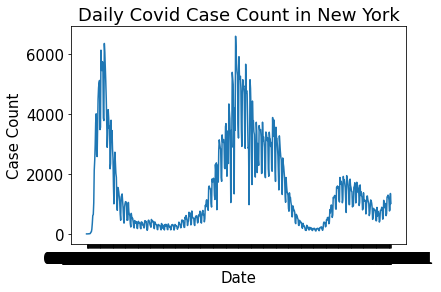

In [41]:
# Covid Daily Counts Dataset
plt.plot(CovidDailyCounts['DATE_OF_INTEREST'], CovidDailyCounts['CASE_COUNT'])
plt.rcParams.update({'font.size': 15})
plt.title("Daily Covid Case Count in New York")
plt.xlabel("Date")
plt.ylabel("Case Count")
plt.savefig('./visualizations/death_case.png')
plt.show()

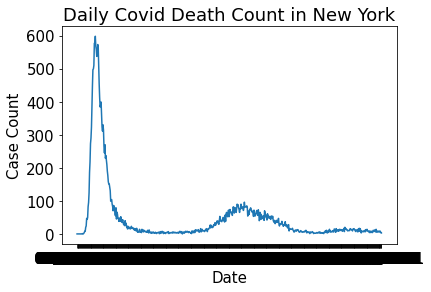

In [42]:
plt.plot(CovidDailyCounts['DATE_OF_INTEREST'], CovidDailyCounts['DEATH_COUNT'])
plt.title("Daily Covid Death Count in New York")
plt.xlabel("Date")
plt.ylabel("Case Count")
plt.show()

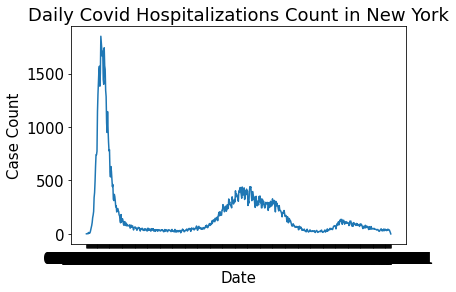

In [43]:
plt.show()
plt.plot(CovidDailyCounts['DATE_OF_INTEREST'], CovidDailyCounts['HOSPITALIZED_COUNT'])
plt.title("Daily Covid Hospitalizations Count in New York")
plt.xlabel("Date")
plt.ylabel("Case Count")
plt.show()

In [44]:
CovidByBoro["Borough"].unique()

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island'],
      dtype=object)

<AxesSubplot:xlabel='Date', ylabel='Admit_All_ages'>

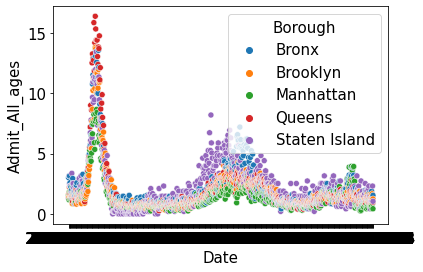

In [45]:
sns.scatterplot(x="Date", y="Admit_All_ages", data=CovidByBoro, hue="Borough")

Text(0.5, 1.0, 'Percent Hospital Admission for Each Borough')

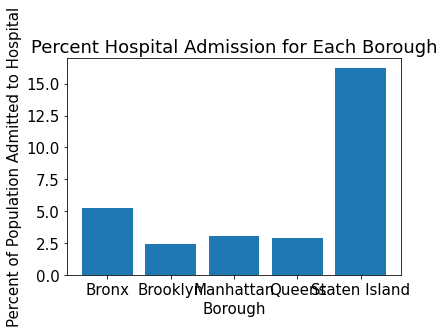

In [46]:
AdmitPerBorough = CovidByBoro.groupby(["Borough"]).sum()["Admit_All_ages"].transpose()
AdmitPerBoroughPop = pd.merge(PopulationByBorough, AdmitPerBorough, right_on="Borough", left_on="Borough", how="right")
AdmitPerBoroughPop["Admit_All_ages"] = AdmitPerBoroughPop["Admit_All_ages"] * 10000
plt.bar(AdmitPerBoroughPop["Borough"], AdmitPerBoroughPop["Admit_All_ages"] / AdmitPerBoroughPop["Population"])  
plt.xlabel("Borough")
plt.ylabel("Percent of Population Admitted to Hospital")
plt.title("Percent Hospital Admission for Each Borough")

In [47]:
mymap = folium.Map(location=[40.7, -73.9], zoom_start=10)
GeoInfo_df = pd.merge(GeoInfo, AdmitPerBoroughPop, left_on="BoroName", right_on="Borough", how="left")
mymap.choropleth(
 geo_data=GeoInfo_df,
 name='Choropleth',
 data=GeoInfo_df,
 columns=['Borough','Admit_All_ages'],
 key_on="feature.properties.Admit_All_ages",
 fill_color='YlGnBu',
 fill_opacity=1,
 line_opacity=0.2,
 legend_name='Resident foreign population in %',
 smooth_factor=0
)
mymap
GeoInfo_df

C:\Users\Stefan\AppData\Local\Programs\Python\Python39\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


ValueError: Cannot render objects with any missing geometries:         BoroName                                           the_geom  BoroCode  \
0      Manhattan  MULTIPOLYGON (((-74.01092841268031 40.68449147...         1   
1          Bronx  MULTIPOLYGON (((-73.89680883223778 40.79580844...         2   
2       Brooklyn  MULTIPOLYGON (((-73.86327471071958 40.58387684...         3   
3  Staten Island  MULTIPOLYGON (((-74.05050806403247 40.56642203...         5   
4         Queens  MULTIPOLYGON (((-73.82644661516991 40.59052744...         4   

      Shape_Leng    Shape_Area        Borough  Population  Admit_All_ages  
0  359993.127161  6.366208e+08      Manhattan     3123068    9.643882e+06  
1  463868.935588  1.187194e+09          Bronx     2717758    1.428709e+07  
2  728195.194837  1.934174e+09       Brooklyn     4970026    1.206971e+07  
3  325924.002252  1.623631e+09  Staten Island      912458    1.477386e+07  
4  900269.281914  3.040206e+09         Queens     4460101    1.314139e+07  

In [ ]:
CovidByBoro.groupby(["Borough"]).sum()["Admit_All_ages"]

Borough
Bronx            1428.709085
Brooklyn         1206.970648
Manhattan         964.388184
Queens           1314.139328
Staten Island    1477.385605
Name: Admit_All_ages, dtype: float64

In [ ]:
CovidByRegion = CovidByRegion.groupby(["Region", "As of Date"]).sum()

Total Patients Hospitalized  \
Region           As of Date                                
CAPITAL REGION   01/01/2021                          431   
                 01/02/2021                          453   
                 01/03/2021                          468   
                 01/04/2021                          476   
                 01/05/2021                          472   
...                                                  ...   
WESTERN NEW YORK 12/27/2020                          494   
                 12/28/2020                          519   
                 12/29/2020                          520   
                 12/30/2020                          542   
                 12/31/2020                          544   

                             Total Patients in ICU  
Region           As of Date                         
CAPITAL REGION   01/01/2021                     72  
                 01/02/2021                     71  
                 01/03/2021                     70  
                 01/04/2021                     75  
                 01/05/2021                     70  
...                                            ...  
WESTERN NEW YORK 12/27/2020                     82  
                 12/28/2020                     85  
                 12/29/2020                     90  
                 12/30/2020                    101  
                 12/31/2020                     94  

[6120 rows x 2 columns]

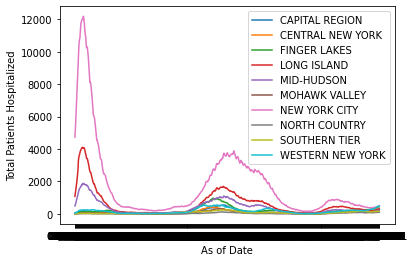

In [ ]:
sns.lineplot(x="As of Date", y="Total Patients Hospitalized", data=CovidByRegion, hue="Region")
plt.legend(loc="upper right")

In [ ]:
# Predicting chance to get Covid based on Region, Age and Date
